# Kerchunk JSON File Recipe
The standard format for Kerchunk files is JSON for storing references to archive data chunks. This requires fsspec and xarray - although these do not need to be the latest, there is no need to not use fsspec 2023.6.0+ and xarray 2023.8.0+ as these will also work with Parquet.

In [2]:
import fsspec
import xarray as xr

Open a virtual filesystem object from fsspec, providing the kerchunk file as a 'reference' type file. Note that if the file is compressed using zstd as some kerchunk files are, the compression needs to be set to 'zstd'/'zst'

In [3]:
complete_path = '/gws/nopw/j04/esacci_portal/kerchunk_conversion/in_progress//'
kfile = f'{complete_path}/cloud_v1/ESACCI-L3C_CLOUD-CLD_PRODUCTS-MODIS_TERRA-200002-201412-fv2.0/kerchunk-1a.json'

mapper = fsspec.get_mapper('reference://',fo=kfile, backend_kwargs={'compression':None}, remote_protocol='https')
ds = xr.open_zarr(mapper, consolidated=False, decode_times=True)

Then we can open a virtual xarray dataset object to plot or perform some processing.

In [4]:
ds = xr.open_zarr(mapper, consolidated=False, decode_times=True)

In [5]:
ds.prsn

<xarray.DataArray 'prsn' (time: 1980, lat: 192, lon: 288)>
dask.array<open_dataset-prsn, shape=(1980, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        At surface; includes precipitation of all forms of water ...
    history:        2020-06-08T08:46:50Z altered by CMOR: Converted type from...
    long_name:      Snowfall Flux
    original_name:  PRECSC+PRECSL
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

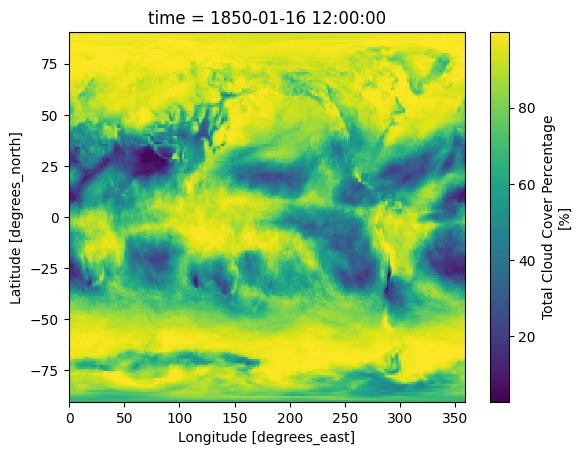

In [5]:
ds.clt.sel(time='1850-01-16').plot()

Any plotting can then be done with this object.

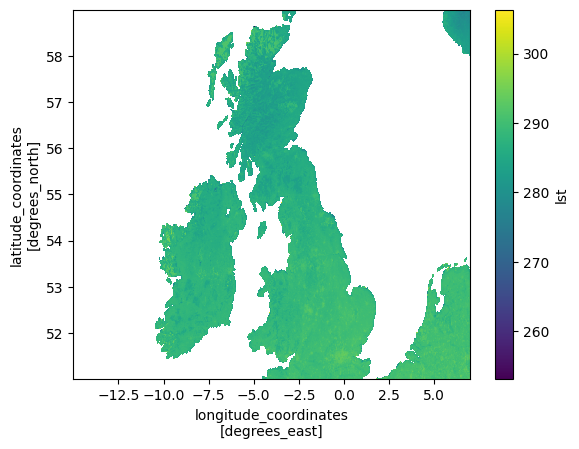

In [5]:
ds['lst'].sel(lat=slice(51,59), lon=slice(-15,7)).mean(dim='time').plot()